<a href="https://colab.research.google.com/github/MelihKlc/Deep-Learning/blob/main/NN_overall_ranking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* importing libraries
* importing dataset
* creating an object which has OneHotEncoder(if we have categorical datas) and feature scaling
* creating features and outpur or X and y or independent and dependent variables
* splittin our data into test and training set
* applying feature scaling object to our x_train and x_test but dont fit the xtest
* create a model
* compile a model
* fit the model with scaling values
* evaluate it

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataset = pd.read_csv("50_Startups.csv")
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder , MinMaxScaler

ct = make_column_transformer((MinMaxScaler() , ["R&D Spend" , "Administration" , "Marketing Spend" ]) ,
                             (OneHotEncoder(handle_unknown= "ignore") , ["State"] )
                             )




In [ ]:
X = dataset.drop("Profit", axis=1)
y = dataset["Profit"]
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size =  0.2 , random_state=42)

In [ ]:
ct.fit(X_train)

X_train_scale = ct.transform(X_train)
X_test_scale = ct.transform(X_test)

In [ ]:
#Create a model
tf.random.set_seed(42)

model = tf.keras.Sequential(
    [tf.keras.layers.Dense(100 , activation = "relu") ,
      tf.keras.layers.Dense(100 ) ,
     tf.keras.layers.Dense(1)
     ]

)
#compile a model
model.compile(loss = tf.keras.losses.mae ,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01) ,
              metrics = ["mae"]
              )

#Fit a model

history = model.fit(X_train_scale , y_train , epochs = 500)

Epoch 1/500
2/2 [==============================] - 6s 14ms/step - loss: 115651.6641 - mae: 115651.6641
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 115648.7891 - mae: 115648.7891
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 115644.1094 - mae: 115644.1094
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 115636.2266 - mae: 115636.2266
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 115623.5469 - mae: 115623.5469
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 115604.4219 - mae: 115604.4219
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 115576.6875 - mae: 115576.6875
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 115537.6719 - mae: 115537.6719
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 115485.8750 - mae: 115485.8750
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 115417.85

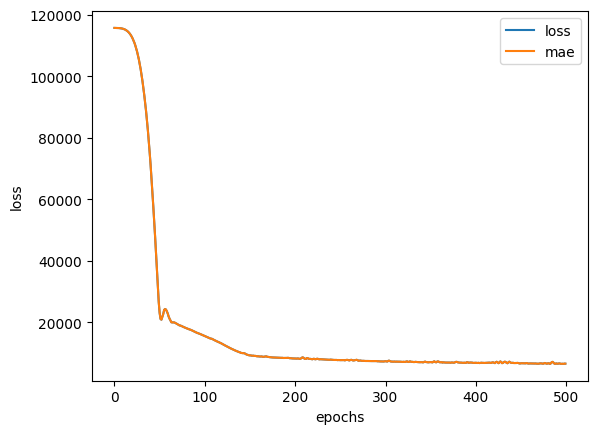

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
model.evaluate(X_test_scale , y_test)

1/1 [==============================] - 0s 177ms/step - loss: 6640.9346 - mae: 6640.9346


[6640.9345703125, 6640.9345703125]